In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.drop(['Unnamed: 0','Clothing ID'],axis=1,inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.shape

(23486, 9)

In [4]:
df.dropna(subset=['Review Text'],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head(5)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.shape

(22641, 9)

In [5]:
df['Category']='Bad'
df.loc[df['Rating']>3,['Category']]='Good'
df.head(5)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


<h2>Data Visualisation</h2>

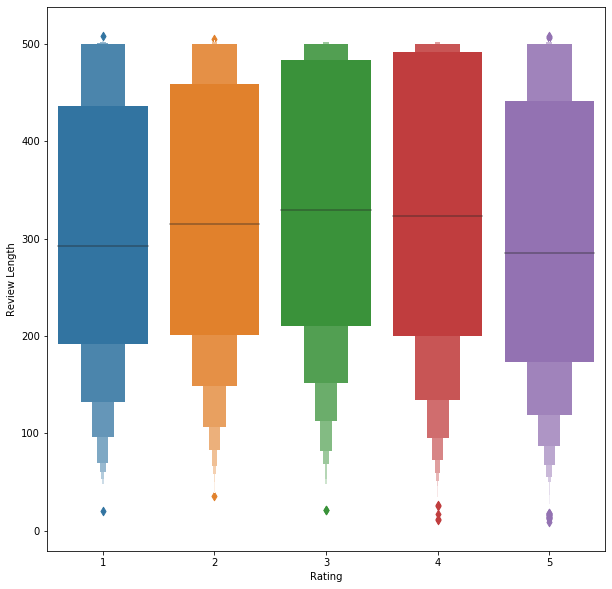

In [9]:
# 1. to find the correlation between review length and rating
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)
plt.figure(figsize=(10,10))
vis1=sns.boxenplot(x='Rating', y='Review Length', data=df)



review length tends to increase as the rating increases and rating 3,4 has more Length compare to others

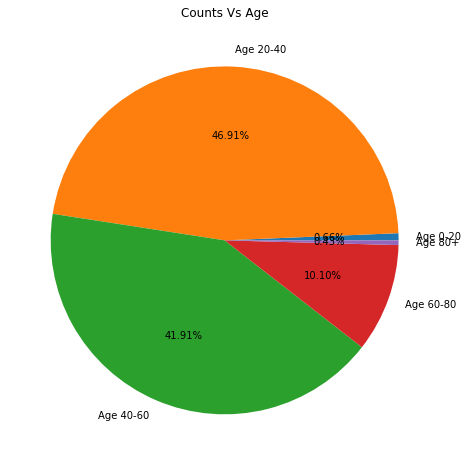

In [12]:
NAR = [df.Age[(df['Age']<=20)].count(),df.Age[(df['Age']>20) & (df['Age']<=40)].count(),
        df.Age[(df['Age']>40) & (df['Age']<=60)].count(),df.Age[(df['Age']>60) & (df['Age']<=80)].count(),
       df.Age[(df['Age']>80)].count()]
       

AR = ['Age 0-20','Age 20-40','Age 40-60','Age 60-80','Age 80+']

plt.figure(figsize=(12,8))

plt.pie(NAR, labels=AR, autopct='%.2f%%')
plt.title("Counts Vs Age")
plt.show()

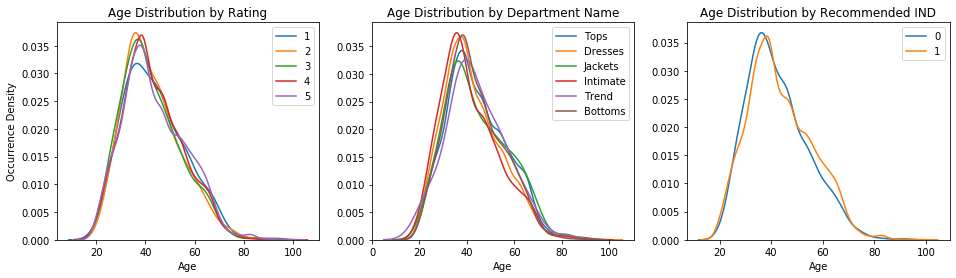

In [13]:
f, axes = plt.subplots(1,3, figsize=(16,4))

p_df = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(p_df[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("Age")
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('Age Distribution by {}'.format(y))

axes[0].set_ylabel('Occurrence Density')
plt.show()

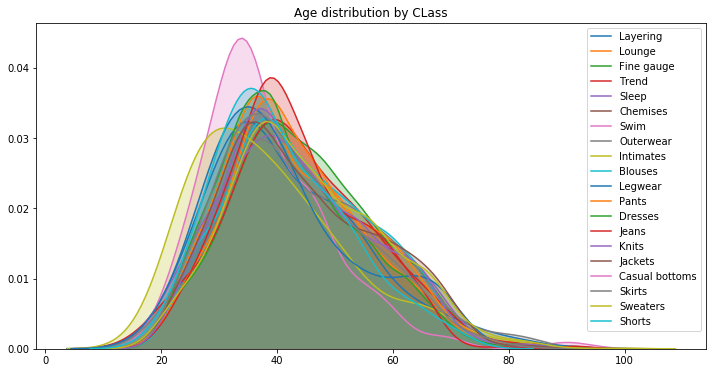

In [14]:
plt.figure(figsize=(12,6))
plt.title("Age distribution by CLass")
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(p_df[df["Class Name"]==x], label=x, shade=True,legend=True)

Text(0, 0.5, 'Rating Counts')

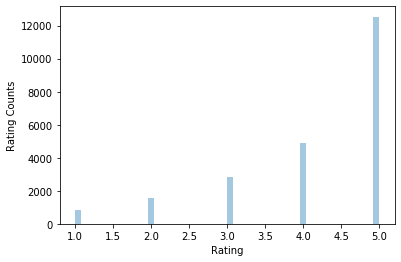

In [7]:
# For ratings
ax = sns.distplot(df['Rating'],kde=False)
ax.set_ylabel('Rating Counts')

Most ratings have been for 4.0 and above with most customers rating products as 5.0

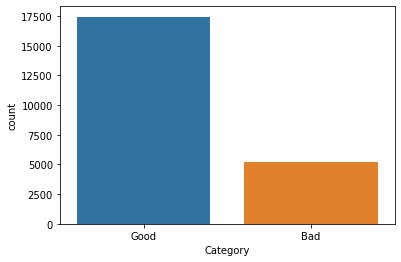

In [8]:
# Category comparisons
sns.countplot(x='Category',data=df)

Clearly number of Good reviews in the dataset is way greater than Bad reviews making it imbalanced.

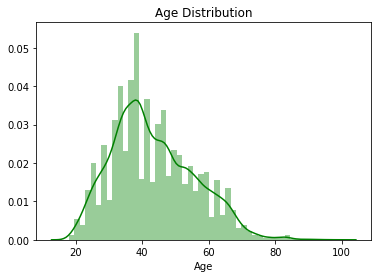

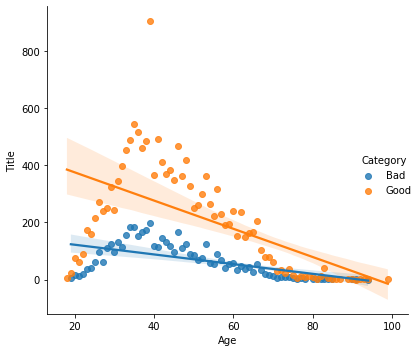

In [9]:
# Age group which gives more reviews and also what kind of reviews

ax=sns.distplot(df['Age'],color='green')
ax.set_title('Age Distribution')

df_gb = df.groupby(['Category','Age']).count()
df_gb.reset_index(inplace=True)
ax=sns.lmplot(x='Age',y='Title',data=df_gb,hue='Category')
plt.tight_layout()
plt.show()

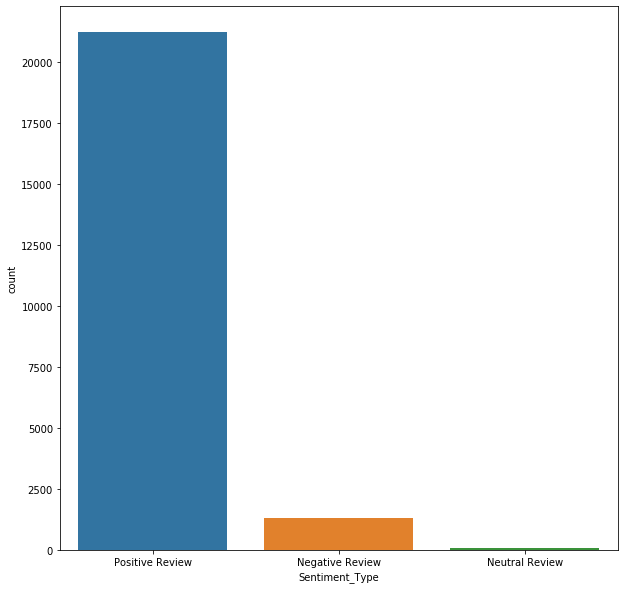

In [10]:
#Sentiment Analysis

from textblob import TextBlob

list_desc = list()

df_review_str=df['Review Text'].astype(str)

for row in df_review_str:
    blob = TextBlob(row)
    list_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    
    df_polarity = pd.DataFrame(list_desc, columns = ['Review','sentiment','polarity'])
 
def function_for_sentiment_analysis(df_polarity):
    if df_polarity['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity['Sentiment_Type'] = df_polarity.apply(function_for_sentiment_analysis, axis=1)

plt.figure(figsize=(10,10))

ax = sns.countplot(x="Sentiment_Type", data=df_polarity)

In [10]:
df.shape

(22641, 10)

From above two plots it can be seen that most reviews are from customers of age group 30-50 years of age and most of them are good reviews

<h1>Data Preparation for Model Training</h1>

In [6]:
# Improving Format of Review Text using nltk
import string
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer as wnl
from nltk.tokenize import RegexpTokenizer as ret
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Remove punctuatuions and lower words.
tokenizer = ret(r'\w+')
df['Review Text']= df['Review Text'].apply(lambda x : tokenizer.tokenize(x.lower()))
df['Review Text'].head(10)

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, s, sooo, pretty, i, ha...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, s, f...
4    [this, shirt, is, very, flattering, to, all, d...
5    [i, love, tracy, reese, dresses, but, this, on...
6    [i, aded, this, in, my, basket, at, hte, last,...
7    [i, ordered, this, in, carbon, for, store, pic...
8    [i, love, this, dress, i, usually, get, an, xs...
9    [i, m, 5, 5, and, 125, lbs, i, ordered, the, s...
Name: Review Text, dtype: object

In [8]:
#remove stopwords
def rem_stopwords(text) :
    word=[w for w in text if w not in stopwords.words('english')]
    return word
df['Review Text']= df['Review Text'].apply(lambda x : rem_stopwords(x))

lemmatizer=wnl()
def lemm(text) : 
    lt=[lemmatizer.lemmatize(i) for i in text]
    return lt
df['Review Text']=df['Review Text'].apply(lambda x : lemm(x))

# Remove numbers
def rem_digit(text) :
    output = ' '.join(c for c in text if not c.isdigit())
    return output
df['Review Text']=df['Review Text'].apply(lambda x : rem_digit(x))

df.head(5)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,Good
1,34,NaN,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses,Good
2,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,Bad
3,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,Good
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,Good


In [14]:
df1 = df.copy()
df1.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,Good
1,34,NaN,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses,Good
2,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,Bad
3,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,Good
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,Good


In [9]:
# LabelEncoding on Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['Good','Bad'])
df['Category'] = le.transform(df['Category'])
df.head(5)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Category
0,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,1
1,34,NaN,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses,1
2,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,0
3,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,1
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,1


In [10]:
# For train_test_split 
from sklearn.model_selection import train_test_split
X = df[['Review Text','Recommended IND']]
y = df['Category']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [17]:
X_train.shape

(18112, 2)

In [18]:
X_test.shape

(4529, 2)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfv = TfidfVectorizer(max_features=2000,ngram_range=(1,2),analyzer='word')
ctv = CountVectorizer(max_features=2000,ngram_range=(1,2),analyzer='word')

In [12]:
#fitting tfv into train and test dataset
tfv.fit(list(X_train['Review Text'])+list(X_test['Review Text']))
X_train_tfv = tfv.transform(X_train['Review Text'])
X_test_tfv = tfv.transform(X_test['Review Text'])

#fitting ctv into train and test dataset
ctv.fit(list(X_train['Review Text'])+list(X_test['Review Text']))
X_train_ctv = ctv.transform(X_train['Review Text'])
X_test_ctv = ctv.transform(X_test['Review Text'])

print(X_train_tfv.shape)
print(X_test_tfv.shape)


(18112, 2000)
(4529, 2000)


In [13]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

X_ind_train = csr_matrix(X_train['Recommended IND']).T
X_ind_test = csr_matrix(X_test['Recommended IND']).T

#print(X_ind_train.shape)
#print(X_ind_test.shape)

X_train_tfv=hstack((X_ind_train,X_train_tfv))
X_test_tfv=hstack((X_ind_test,X_test_tfv))

X_train_ctv=hstack((X_ind_train,X_train_ctv))
X_test_ctv=hstack((X_ind_test,X_test_ctv))



In [15]:
from sklearn.metrics import log_loss as lossfunc
loss = lossfunc

<h1>Model Training</h1>

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import make_scorer
# forming a scorer for GridSearchCV
scorer = make_scorer(loss,needs_proba=True)

In [24]:
# Using GridSearchCV with clf,scorer to evaluate which is better to use tfv or ctv

In [17]:
#initializing GridSearchCV for tfv and ctv
from sklearn.model_selection import GridSearchCV
params = [{'tol':[0.000001,0.00001,0.0001,0.01],'C':[0.5,1.0,1.5,2.0]}]
model_tfv = GridSearchCV(estimator=LogisticRegression(),param_grid=params,scoring=scorer,cv=5)
model_ctv = GridSearchCV(estimator=LogisticRegression(),param_grid=params,scoring=scorer,cv=5)

In [60]:
# Using ctv vectorized training data
model_ctv.fit(X_train_ctv,y_train)
best_ctv_train_params = model_ctv.best_params_
best_ctv_train_score = model_ctv.best_score_

# Using tfv vectorized training data
model_tfv.fit(X_train_tfv,y_train)
best_tfv_train_params = model_tfv.best_params_
best_tfv_train_score = model_tfv.best_score_

In [47]:
print('Best Parameters for training data for ctv vectorizer\n')
print(best_ctv_train_params)
print()
print('Log Loss for training data for ctv vectorizer\n')
print(best_ctv_train_score)

Best Parameters for training data for ctv vectorizer

{'C': 2.0, 'tol': 1e-06}

Log Loss for training data for ctv vectorizer

0.25987515122839555


In [48]:
print('Best Parameters for training data for tfv vectorizer\n')
print(best_tfv_train_params)
print()
print('Log Loss for training data for tfv vectorizer\n')
print(best_tfv_train_score)

Best Parameters for training data for tfv vectorizer

{'C': 0.5, 'tol': 1e-06}

Log Loss for training data for tfv vectorizer

0.19722922995284958


Since Log Loss value for Term Frequency Vectorizer is less than that of Count vectorizer, it is better to use TfidfVectorizer

In [49]:
# using tfv test dataset to predict results
y_pred = model_tfv.predict(X_test_tfv)
from sklearn.metrics import accuracy_score,confusion_matrix
score = accuracy_score(y_test,y_pred)
score
matrix = confusion_matrix(y_test,y_pred)
matrix = pd.DataFrame(matrix)
matrix.columns = ['Bad Predicted','Good Predicted']
matrix.index = ['True Bad','True Good']

In [50]:
print('Accuracy of Logistic Regression Model in Review Prediction : ')
print('%0.2f' % (score*100),'%')
print()
print()
print('Confusion Matrix for the predictions : \n')
print(matrix)

Accuracy of Logistic Regression Model in Review Prediction : 
93.04 %


Confusion Matrix for the predictions : 

           Bad Predicted  Good Predicted
True Bad             763             276
True Good             39            3451


In [78]:
# Using above trained to predict of 2 randomly chosen sample points.
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

print('Review Chosen : ')
rating_positive=df['Review Text'][10]
print(rating_positive)
rating_positive_transformed = tfv.transform([rating_positive])

X_ind = csr_matrix(df['Recommended IND'][10]).T
X_try = hstack((X_ind,rating_positive_transformed))

print('Actual Category : ')
if df['Category'][10]==0:
    print('Bad')
else:
    print('Good')
    
print('Predicted Category : ')
    
if model_tfv.predict(X_try)[0]==0:
    print('Bad')
else:
    print('Good')

Review Chosen : 
dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back
Actual Category : 
Bad
Predicted Category : 
Bad


In [70]:
# Using above trained to predict of 2 randomly chosen sample points.
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

print('Review Chosen : ')
rating_positive=df['Review Text'][50]
print(rating_positive)
rating_positive_transformed = tfv.transform([rating_positive])

X_ind = csr_matrix(df['Recommended IND'][50]).T
X_try = hstack((X_ind,rating_positive_transformed))

print('Actual Category : ')
if df['Category'][50]==0:
    print('Bad')
else:
    print('Good')
    
print('Predicted Category : ')
    
if model_tfv.predict(X_try)[0]==0:
    print('Bad')
else:
    print('Good')

Review Chosen : 
cute top transition easily summer fall fit well nice print comfortable tried store purchase color washed best color blonde would look much better brunette different color likely would purchased
Actual Category : 
Good
Predicted Category : 
Good


In [18]:
Dict = {}
Dict['Logistic Regression'] = 93.04

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
params = [{'alpha':[-1.5,-1.0,-0.5,0.0,1.0]}]
model_tfv = GridSearchCV(MultinomialNB(),param_grid=params,scoring=scorer,cv=5)
model_ctv = GridSearchCV(MultinomialNB(),param_grid=params,scoring=scorer,cv=5)

In [34]:
# fitting model_tfv,model_ctv on X_train_tfv and X_train_ctv respectively
# Using ctv vectorized training data
model_ctv.fit(X_train_ctv,y_train)
best_ctv_train_params = model_ctv.best_params_
best_ctv_train_score = model_ctv.best_score_

# Using tfv vectorized training data
model_tfv.fit(X_train_tfv,y_train)
best_tfv_train_params = model_tfv.best_params_
best_tfv_train_score = model_tfv.best_score_

In [35]:
print('Best Parameters for training data for ctv vectorizer\n')
print(best_ctv_train_params)
print()
print('Log Loss for training data for ctv vectorizer\n')
print(best_ctv_train_score)

print('Best Parameters for training data for tfv vectorizer\n')
print(best_tfv_train_params)
print()
print('Log Loss for training data for tfv vectorizer\n')
print(best_tfv_train_score)

Best Parameters for training data for ctv vectorizer

{'alpha': 0.0}

Log Loss for training data for ctv vectorizer

0.5205041100119787
Best Parameters for training data for tfv vectorizer

{'alpha': 0.0}

Log Loss for training data for tfv vectorizer

0.2637392186150348


Since Log Loss value for Term Frequency Vectorizer is less than that of Count vectorizer, it is better to use TfidfVectorizer

In [36]:
# using tfv test dataset to predict results
y_pred = model_tfv.predict(X_test_tfv)
score = accuracy_score(y_test,y_pred)
score
matrix = confusion_matrix(y_test,y_pred)
matrix = pd.DataFrame(matrix)
matrix.columns = ['Bad Predicted','Good Predicted']
matrix.index = ['True Bad','True Good']

print('Accuracy of Naive Bayes Model in Review Prediction : ')
print('%0.2f' % (score*100),'%')
print()
print()
print('Confusion Matrix for the predictions : \n')
print(matrix)

Accuracy of Naive Bayes Model in Review Prediction : 
89.58 %


Confusion Matrix for the predictions : 

           Bad Predicted  Good Predicted
True Bad             621             418
True Good             54            3436


In [20]:
Dict['Naive Bayes']=89.58

In [43]:
from sklearn.neighbors import KNeighborsClassifier
params = [{'n_neighbors':[3,5,7],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}]

model_tfv = GridSearchCV(KNeighborsClassifier(),param_grid=params,scoring=scorer,cv=5)
model_ctv = GridSearchCV(KNeighborsClassifier(),param_grid=params,scoring=scorer,cv=5)

In [44]:
# fitting model_tfv,model_ctv on X_train_tfv and X_train_ctv respectively
# Using ctv vectorized training data
model_ctv.fit(X_train_ctv,y_train)
best_ctv_train_params = model_ctv.best_params_
best_ctv_train_score = model_ctv.best_score_

# Using tfv vectorized training data
model_tfv.fit(X_train_tfv,y_train)
best_tfv_train_params = model_tfv.best_params_
best_tfv_train_score = model_tfv.best_score_

In [45]:
print('Best Parameters for training data for ctv vectorizer\n')
print(best_ctv_train_params)
print()
print('Log Loss for training data for ctv vectorizer\n')
print(best_ctv_train_score)

print('Best Parameters for training data for tfv vectorizer\n')
print(best_tfv_train_params)
print()
print('Log Loss for training data for tfv vectorizer\n')
print(best_tfv_train_score)

Best Parameters for training data for ctv vectorizer

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Log Loss for training data for ctv vectorizer

2.2300866210599155
Best Parameters for training data for tfv vectorizer

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

Log Loss for training data for tfv vectorizer

1.883531135368432


Since Log Loss value for Term Frequency Vectorizer is less than that of Count vectorizer, it is better to use TfidfVectorizer

In [47]:
# using tfv test dataset to predict results
y_pred = model_tfv.predict(X_test_tfv)
score = accuracy_score(y_test,y_pred)
score
matrix = confusion_matrix(y_test,y_pred)
matrix = pd.DataFrame(matrix)
matrix.columns = ['Bad Predicted','Good Predicted']
matrix.index = ['True Bad','True Good']

print('Accuracy of KNeighborsClassifier Model in Review Prediction : ')
print('%0.2f' % (score*100),'%')
print()
print()
print('Confusion Matrix for the predictions : \n')
print(matrix)

Accuracy of KNeighborsClassifier Model in Review Prediction : 
92.45 %


Confusion Matrix for the predictions : 

           Bad Predicted  Good Predicted
True Bad             769             270
True Good             72            3418


In [21]:
Dict['KNeighborsClassifier']=92.45

In [30]:
from sklearn.tree import DecisionTreeClassifier
params = [{'max_depth':[100,1000,10000],'min_samples_split':[2,4,6],'min_samples_leaf':[6,8,10]}]
model_tfv = GridSearchCV(DecisionTreeClassifier(),param_grid=params,scoring=scorer,cv=5)
model_ctv = GridSearchCV(DecisionTreeClassifier(),param_grid=params,scoring=scorer,cv=5)

In [31]:
# fitting model_tfv,model_ctv on X_train_tfv and X_train_ctv respectively
# Using ctv vectorized training data
model_ctv.fit(X_train_ctv,y_train)
best_ctv_train_params = model_ctv.best_params_
best_ctv_train_score = model_ctv.best_score_

# Using tfv vectorized training data
model_tfv.fit(X_train_tfv,y_train)
best_tfv_train_params = model_tfv.best_params_
best_tfv_train_score = model_tfv.best_score_

In [34]:
print('Best Parameters for training data for ctv vectorizer\n')
print(best_ctv_train_params)
print()
print('Log Loss for training data for ctv vectorizer\n')
print(best_ctv_train_score)

print('Best Parameters for training data for tfv vectorizer\n')
print(best_tfv_train_params)
print()
print('Log Loss for training data for tfv vectorizer\n')
print(best_tfv_train_score)

Best Parameters for training data for ctv vectorizer

{'max_depth': 10000, 'min_samples_leaf': 6, 'min_samples_split': 4}

Log Loss for training data for ctv vectorizer

1.3820703421848985
Best Parameters for training data for tfv vectorizer

{'max_depth': 1000, 'min_samples_leaf': 6, 'min_samples_split': 2}

Log Loss for training data for tfv vectorizer

1.573566211334705


Since Log Loss value for Count Vectorizer is less than that of Term Frequency vectorizer, it is better to use CountVectorizer

In [35]:
# using ctv test dataset to predict results
y_pred = model_ctv.predict(X_test_ctv)
score = accuracy_score(y_test,y_pred)
score
matrix = confusion_matrix(y_test,y_pred)
matrix = pd.DataFrame(matrix)
matrix.columns = ['Bad Predicted','Good Predicted']
matrix.index = ['True Bad','True Good']

print('Accuracy of DecisionClassifier Model in Review Prediction : ')
print('%0.2f' % (score*100),'%')
print()
print()
print('Confusion Matrix for the predictions : \n')
print(matrix)

Accuracy of DecisionClassifier Model in Review Prediction : 
91.10 %


Confusion Matrix for the predictions : 

           Bad Predicted  Good Predicted
True Bad             795             244
True Good            159            3331


In [22]:
Dict['Decision Tree Classifier']=91.10

In [24]:
from sklearn.svm import SVC
params =[{'kernel': ['linear'], 'C': [1, 10, 100, 1000],
                     'max_iter': [-1, 1], 'random_state': [4, 8]}]

model_tfv = GridSearchCV(SVC(probability=True),param_grid=params,scoring=scorer,cv=5)
model_ctv = GridSearchCV(SVC(probability=True),param_grid=params,scoring=scorer,cv=5)


In [ ]:
# fitting model_tfv,model_ctv on X_train_tfv and X_train_ctv respectively
# Using ctv vectorized training data
model_ctv.fit(X_train_ctv,y_train)
best_ctv_train_params = model_ctv.best_params_
best_ctv_train_score = model_ctv.best_score_

# Using tfv vectorized training data
model_tfv.fit(X_train_tfv,y_train)
best_tfv_train_params = model_tfv.best_params_
best_tfv_train_score = model_tfv.best_score_

Used Logistic Regression, Naive Bayes, DecisionTree Classifier and KNeighbors Classifier as models for classification tecniques.

Trained all models on both TfidfVectorized and CountVectorized review texts and then used log_loss function to compare which vector is better to use.

On comparing found that except DecisionTree Classifier all other models performed better on TfidfVectorized data.
After fitting the models, they were tested on the testing dataset and accuracy score and confusion matrix was used to measure accuracy and were stored in descending order in the following dictionary Models_Dict.

In [50]:
Models_Dict = {k:v for k,v in sorted(Dict.items(),key = lambda item:item[1],reverse=True)}
print(Models_Dict)

{'Logistic Regression': 93.04, 'KNeighborsClassifier': 92.45, 'Decision Tree Classifier': 91.23, 'Naive Bayes': 89.58}


<h2> List of Models with their Accuracy in % in decreasing order : </h2>

         1. Logistic Regression   : 93.04%
         2. KNeighborsClassifier  : 92.45%
         3. DecisionTreeClassifier: 91.23%
         4. Naive Bayes           : 89.58%